# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from scipy import stats
from scipy.stats import zscore

# Load Data

In [2]:
# prepare column names
col_names=["ID", "Class"]
for i in range(1,31):
    col_names.append("attr {}".format(i))

In [3]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data' 
data = pd.read_csv(data_url, sep=',', names=col_names)
print(data.shape)

(569, 32)


In [4]:
data.head()

,ID,Class,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,...,attr 21,attr 22,attr 23,attr 24,attr 25,attr 26,attr 27,attr 28,attr 29,attr 30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Explortions

## Box plot

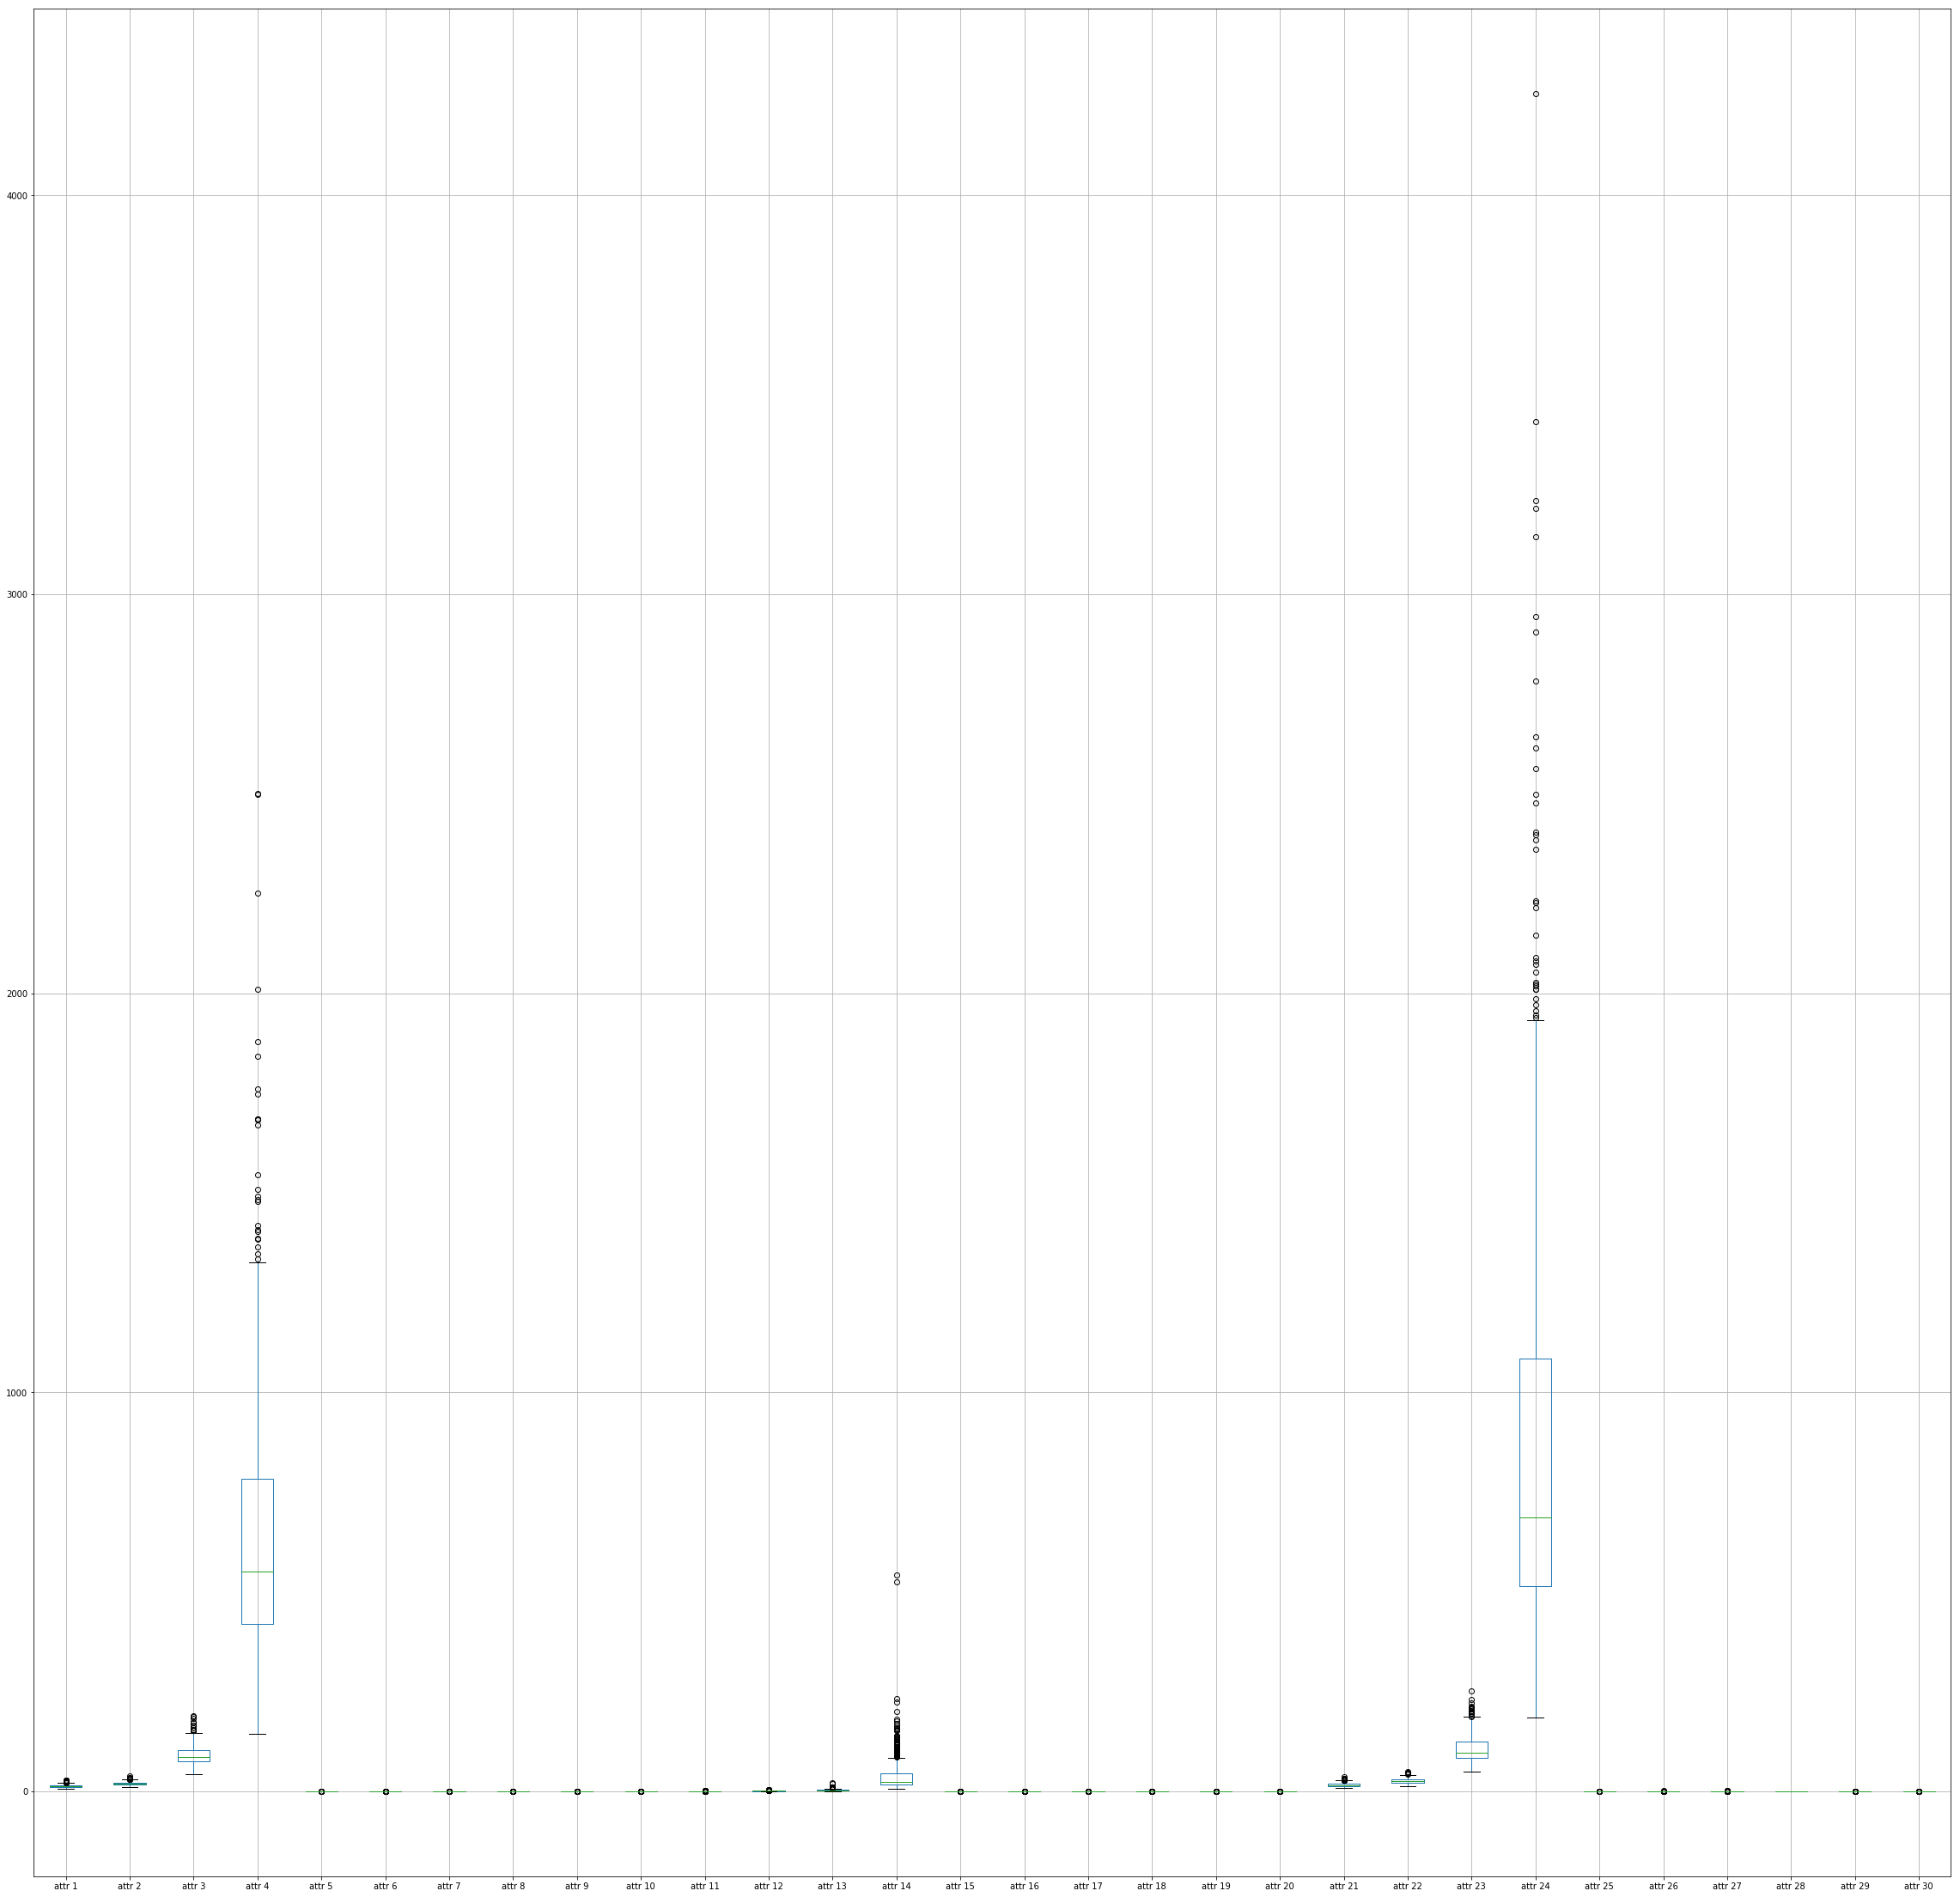

In [5]:
boxplot = data.iloc[:,2:].boxplot(column=col_names[2:], figsize=(40,40))

### Conclusion
- most of the values of the attributes are around zero
- attr 4 and attr 24 : has more bigger and spread values
- attr 14 : has many outliers

## correlation matrix

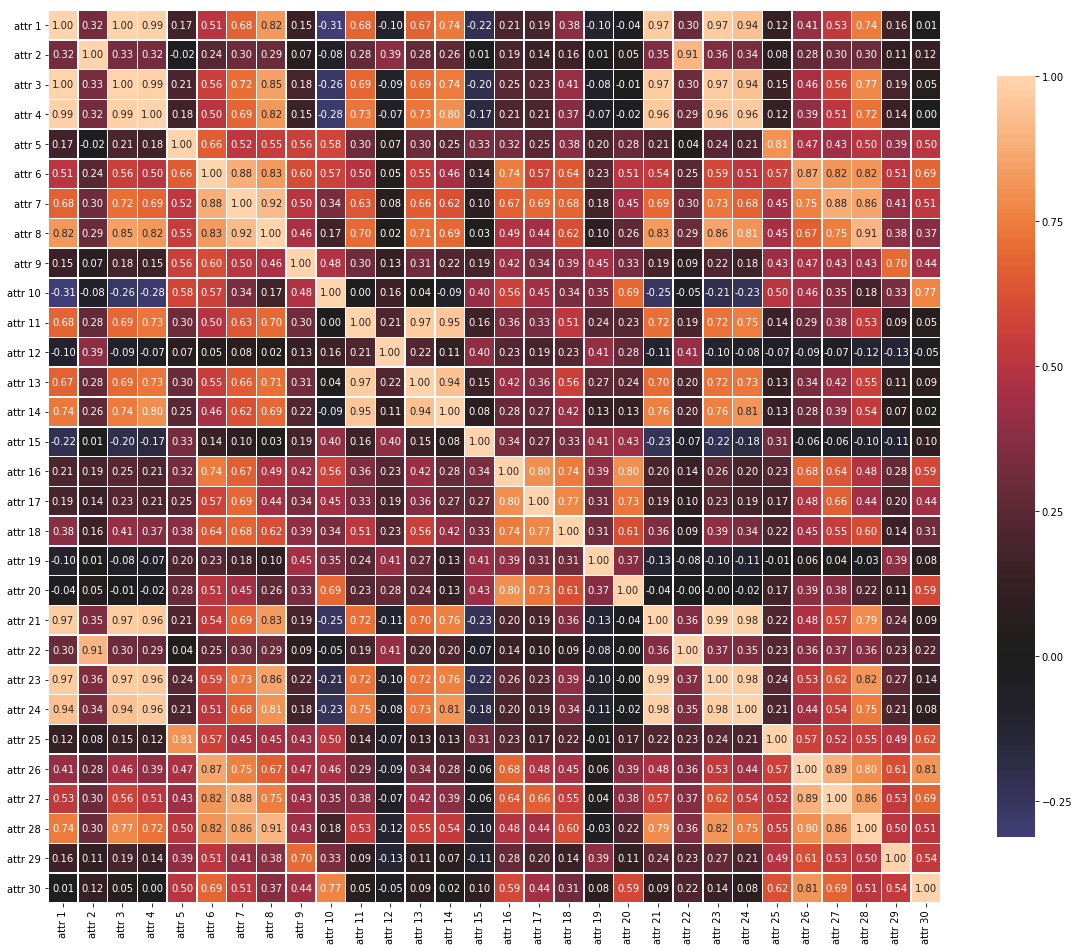

In [6]:
def correlation_heatmap(data):
    correlations = data.corr(method='pearson')
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(data.iloc[:,2:])

### Conclusion 
- some of the attributes have high positive correlation 
- most of the attributes have medium positive correlation 
- a small set of attributes have low positive correlation
- Examples :
    - attrs (21, 23, 24) vs attrs (1, 3, 4)  has a very strong correltion
    - atrrs( 25, 26, 27, 28, 29, 30) has a very strong correltion
    - attrs (15, 16, ..., 20) vs attrs (1, 2 , 3 , 4) has very weak correlation 

## Line plot

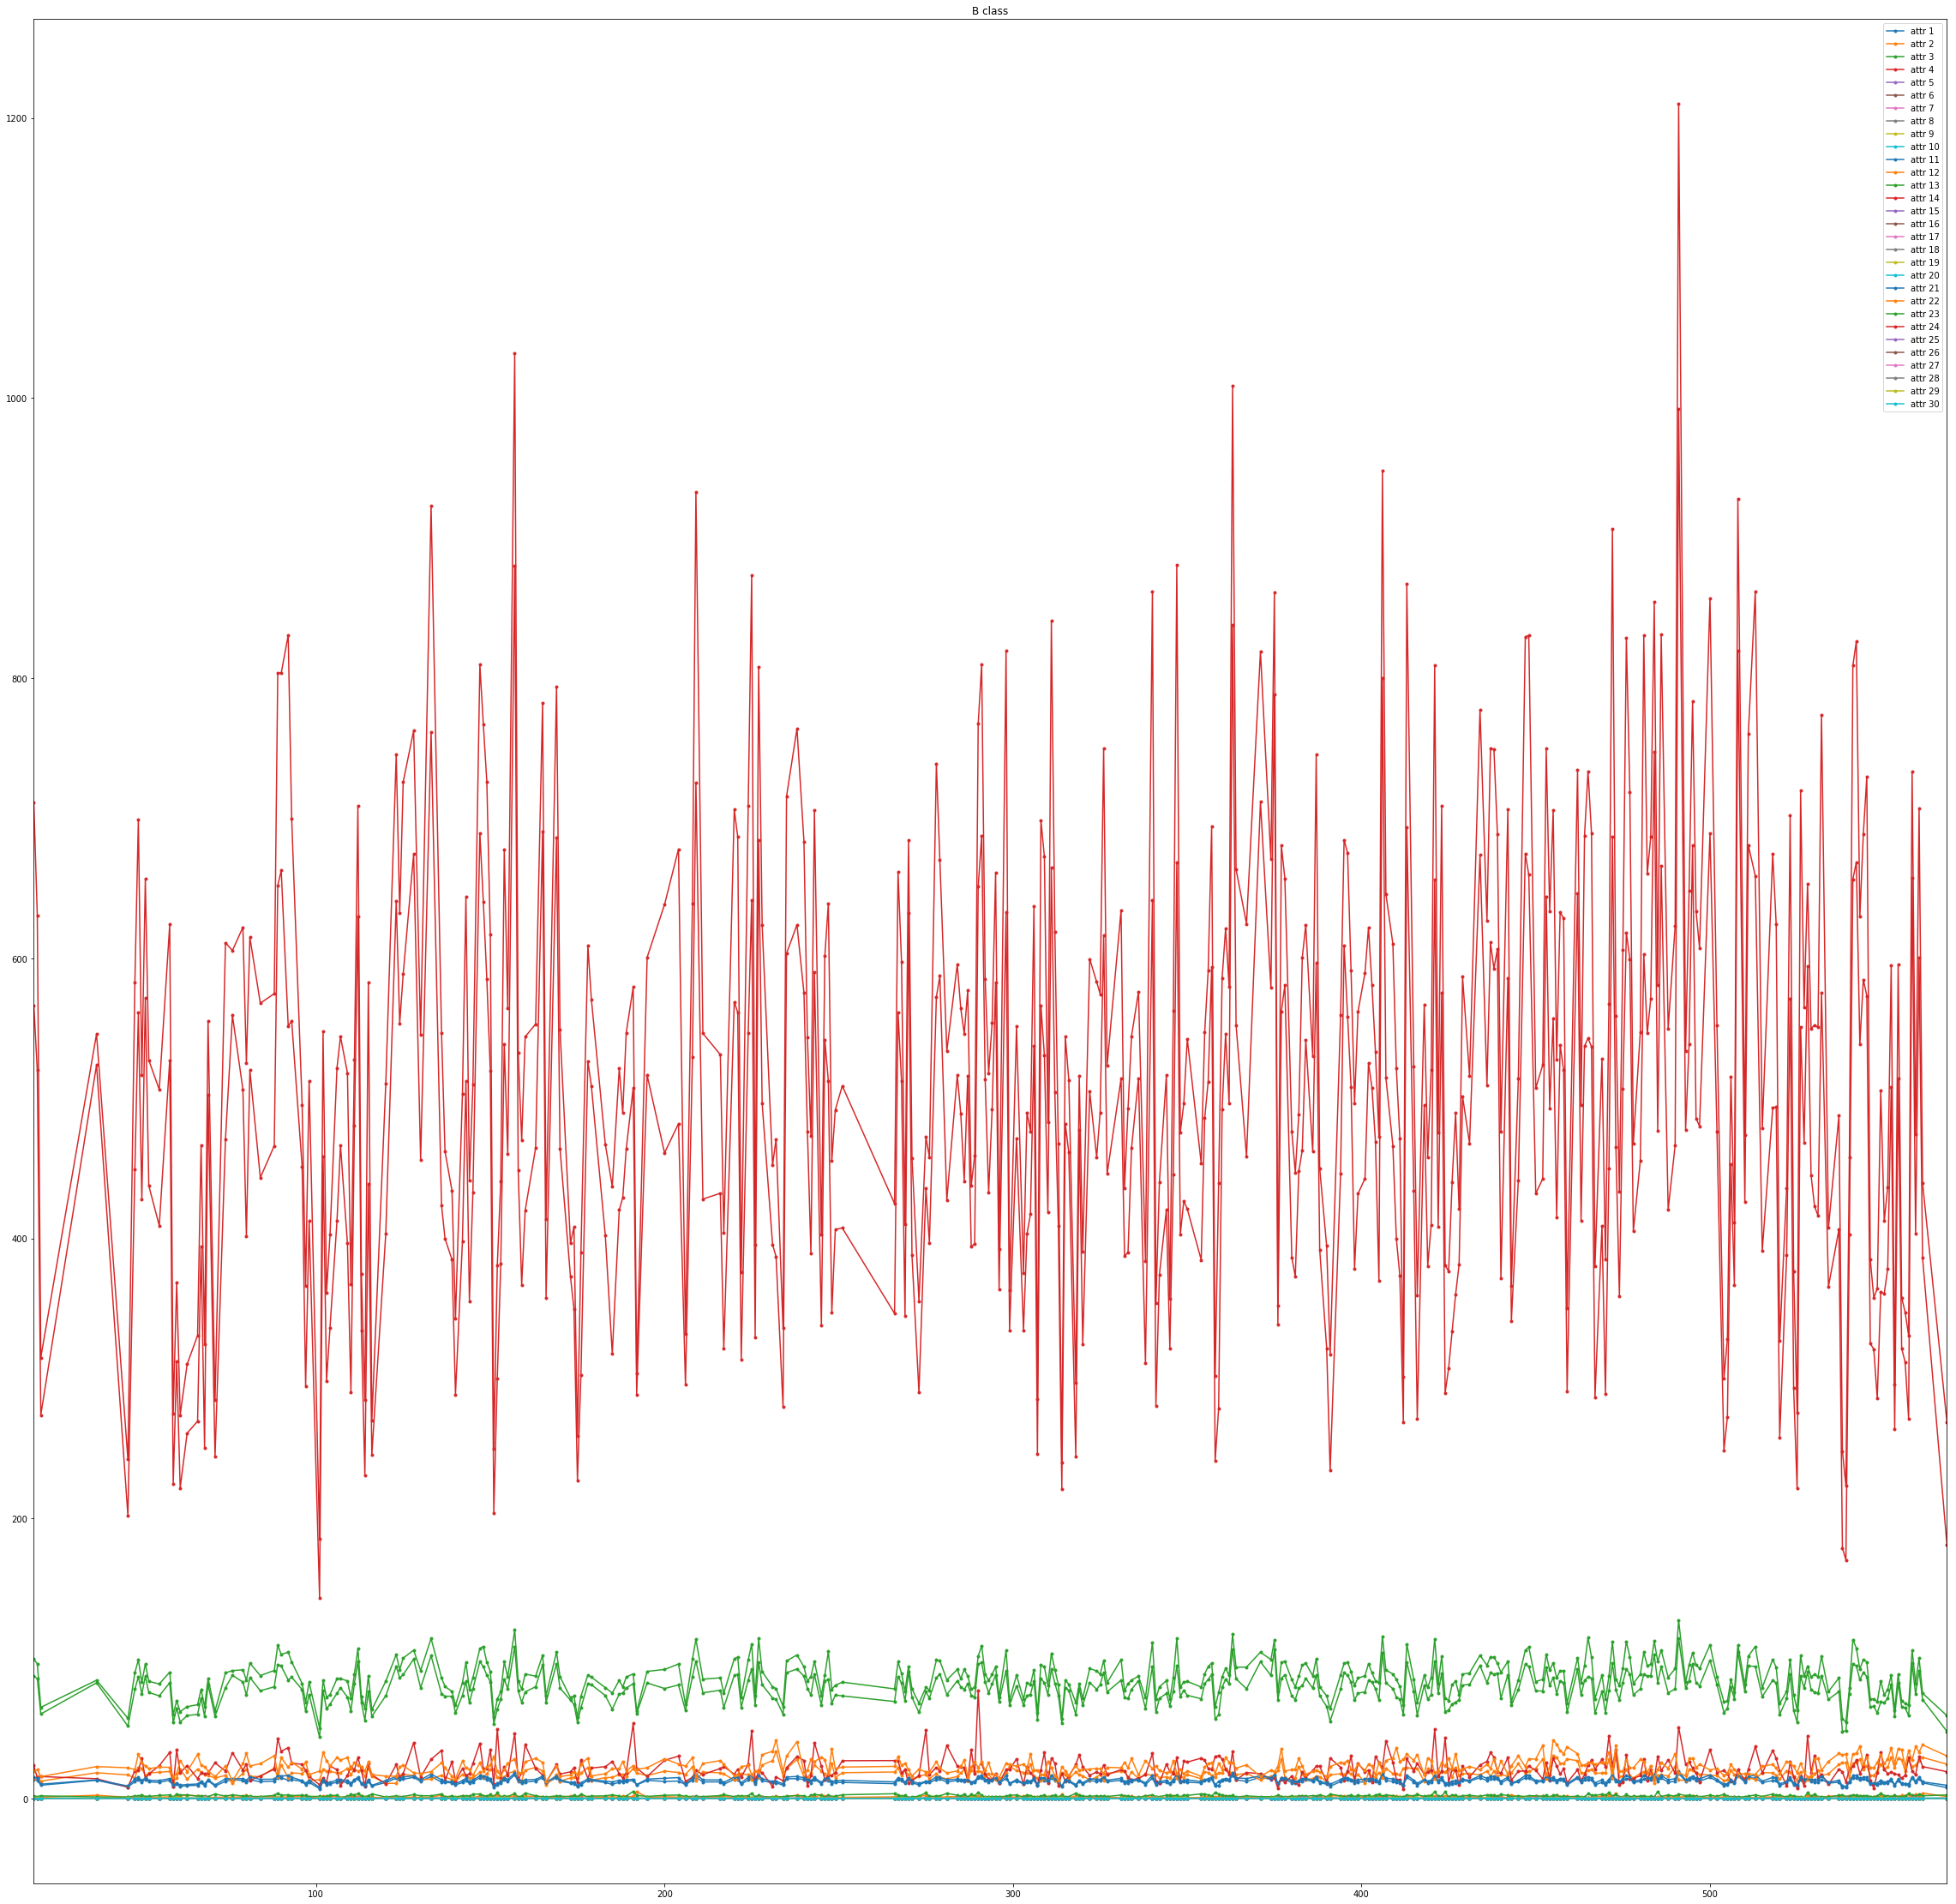

In [7]:
B_data = data.iloc[:,2:].loc[data['Class'] == "B"]
B_data.plot(style='.-', figsize=(40,40), title= "B class")

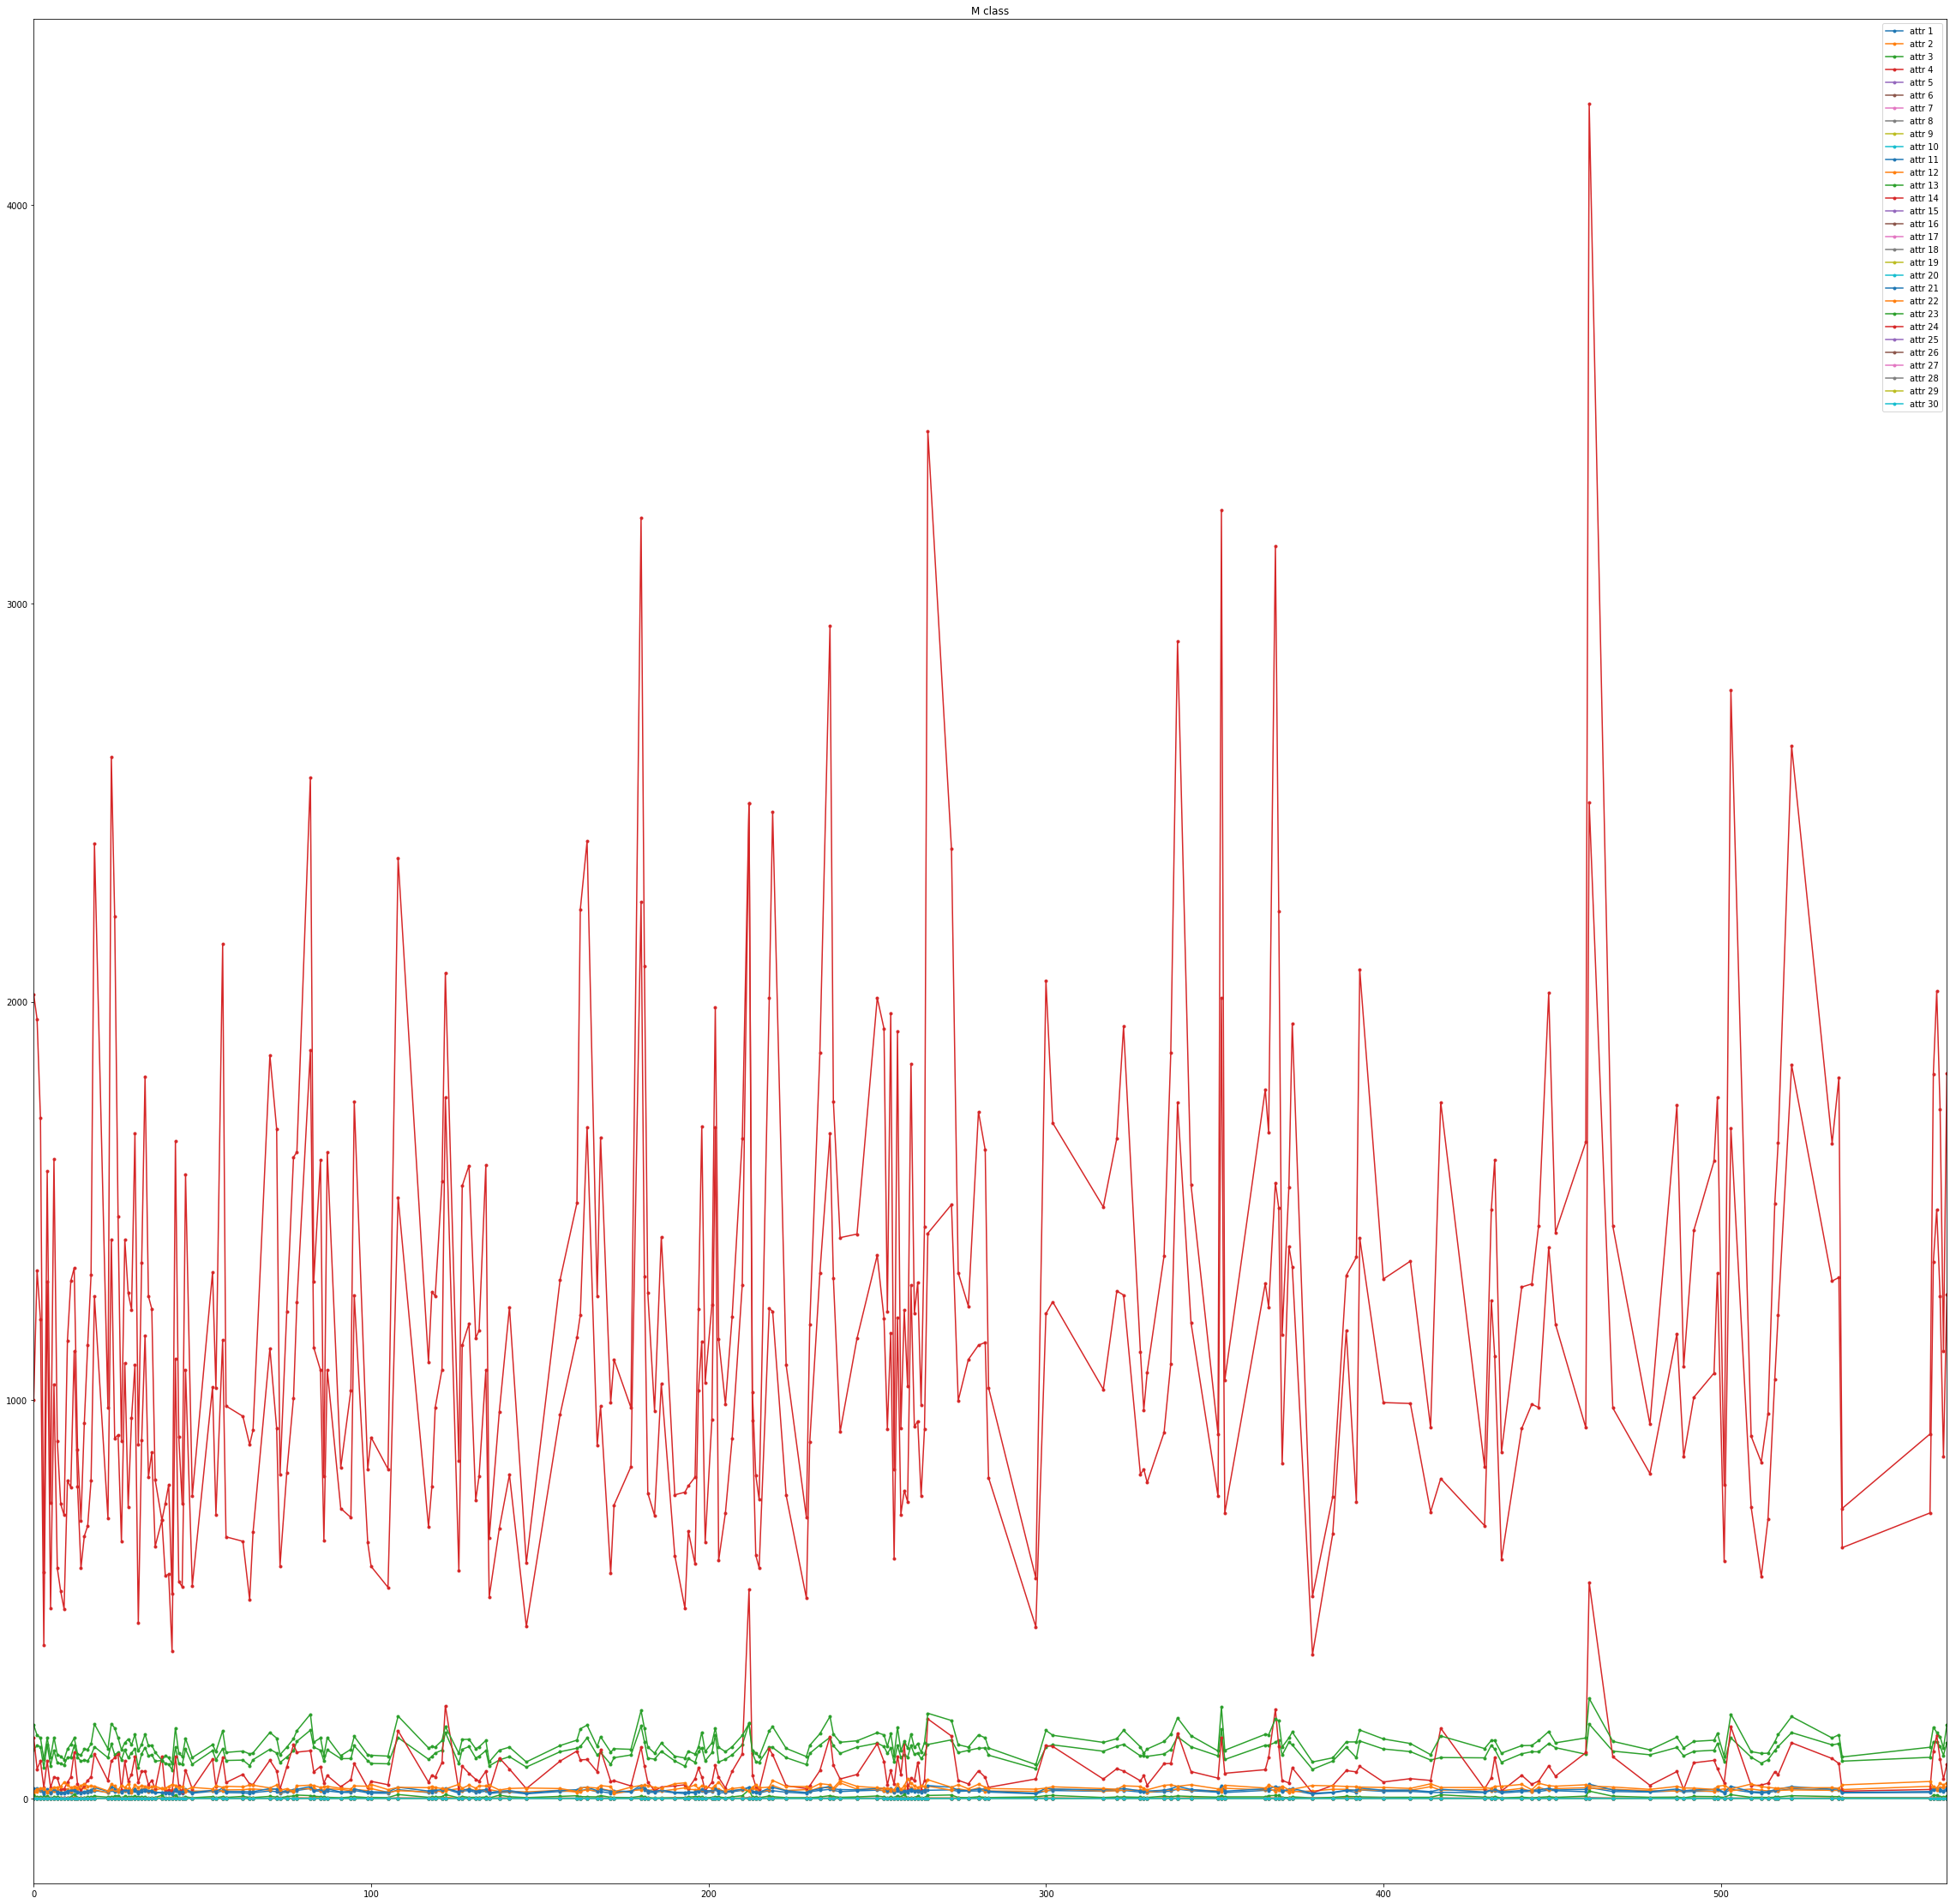

In [8]:
M_data = data.iloc[:,2:].loc[data['Class'] == "M"]
M_data.plot(style='.-', figsize=(40,40), title= "M class")

### Conclusion 
- by comparing both attr 3 and attr 23 seems to has a higher value in class 'B' than in class' (colored by green)
- same for attr 1, 2, 21, 22, 11, 12 ( colored by blue and orange)

## splitting the data into train and test

In [9]:
def split(data, labels):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
    for train_index, test_index in sss.split(data, labels):
        print(train_index)
        x_train, x_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
    return train_index, test_index

In [10]:
train_index, test_index = split(data.iloc[:,2:], data.iloc[:,1])

[ 58 400  46 303 158 340 553 483 492 458  29 278 310 159 313 213 214 143
  56 460 228  37 262 153 540 501 425 203 164 299 231  57 471 516 197  76
 462  65 476 366 375 446 162 495 399  83 393 426 178 419  98 308 488 235
  64 410 511  88 281 456 218 421  17 344 240  61  44 403 237 129 309 350
  63 445 391 141  38  84 289 439 411  42  27 334 101 372 502 208 371 180
 238 184 174  78 513  33 405 179 110 253 413 175  72 287 542  94 485 406
 104 565 168 398 157 264 376 291 204 528  22 236 211 106 258 481 562 452
 515 181 352 298 120 224 294 463 534 363 519 290 543  99 268  89 537  49
   0 273 154 348 151 347 226 500 427 518 198 155 317 306  13 300 547 353
 323  28 364 220 432 469 277 494 466  21 217  59 132 266 423 478 541 490
 388 319 467 311 195 245 239 105 520 568 532 561 514  48  75 331 282 454
 328 160 189 166 535  62 533 435 170 431 209 117 385 232 505  39 246 167
  74 414 102  67 148 145 219 190 384 392 250 545 316 506 109 233 113  15
  20 428 185 125 429 156  10 333 261 523 251 212  8

In [11]:
train_data = data.iloc[train_index]
test_data = data.iloc[test_index]

# Preprocessing

## Z-score

### Train data

In [12]:
# skip applying 'z-score' on class, Id columns
cols = train_data.columns[2:]
x = train_data[cols]# skip applying 'z-score' on constant columns
x_scaled = x.apply(lambda x: x if np.std(x) == 0 else zscore(x)) 
temp_data = pd.DataFrame(x_scaled, columns = cols)
temp_data.insert(0,'ID',train_data.iloc[:,0].values, True)
temp_data.insert(1,'Class',train_data.iloc[:,1].values, True)
train_data = temp_data
train_data.head()

,ID,Class,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,...,attr 21,attr 22,attr 23,attr 24,attr 25,attr 26,attr 27,attr 28,attr 29,attr 30
58,857810,B,-0.295817,-0.011294,-0.373049,-0.355791,-1.099217,-1.208222,-1.078170,-1.120180,...,-0.424933,-0.569846,-0.506134,-0.460855,-1.348744,-1.180266,-1.287705,-1.537814,-0.774872,-1.146057
400,90439701,M,1.092753,0.378088,1.355596,1.000076,1.857247,2.840524,2.921101,1.832198,...,0.960955,0.315642,1.292809,0.799204,2.358964,2.071586,3.073948,1.258709,0.551222,1.927897
46,85713702,B,-1.682673,-0.573734,-1.651229,-1.300657,-0.722686,-0.811290,-0.887286,-1.075499,...,-1.535753,-0.616282,-1.505614,-1.168630,-0.147655,-0.727342,-0.963782,-1.318518,0.320883,-0.541097
303,892657,B,-1.027245,-0.170690,-1.024549,-0.916088,0.727655,-0.675846,-0.798178,-0.772098,...,-1.093619,-0.203161,-1.096488,-0.921770,0.357150,-0.919462,-0.889133,-0.720244,-1.146705,-0.307215
158,871122,B,-0.578674,-1.507338,-0.611726,-0.584092,-0.226921,-0.940652,-0.839024,-0.725374,...,-0.654860,-1.184724,-0.692817,-0.630061,-0.243394,-0.804067,-0.878828,-0.645233,-0.651476,-0.276967


### Test data

In [13]:
# skip applying 'z-score' on class, Id columns
cols = test_data.columns[2:]
x = test_data[cols]# skip applying 'z-score' on constant columns
x_scaled = x.apply(lambda x: x if np.std(x) == 0 else zscore(x)) 
temp_data = pd.DataFrame(x_scaled, columns = cols)
temp_data.insert(0,'ID',test_data.iloc[:,0].values, True)
temp_data.insert(1,'Class',test_data.iloc[:,1].values, True)
test_data = temp_data
test_data.head()

,ID,Class,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,...,attr 21,attr 22,attr 23,attr 24,attr 25,attr 26,attr 27,attr 28,attr 29,attr 30
188,874662,B,-0.676946,-0.427310,-0.714050,-0.647319,0.325708,-1.035590,-0.888042,-0.938717,...,-0.747145,0.188609,-0.815617,-0.648208,0.220231,-1.079878,-0.913989,-1.173659,0.500272,-1.053828
265,88995002,M,1.823529,2.950639,1.752837,2.044622,-0.124372,0.161070,0.534024,0.940292,...,3.214552,3.705858,3.040103,4.012114,0.421767,0.069787,0.293682,0.741450,-0.017653,-0.082199
510,91550,B,-0.696568,-1.091582,-0.671595,-0.655203,-1.150343,-0.199682,-0.338542,-0.651024,...,-0.771010,-1.321698,-0.767431,-0.673074,-1.047207,0.173985,-0.060836,-0.198643,-0.429497,0.900672
31,853612,M,-0.668536,-0.105015,-0.605463,-0.615508,1.089570,0.921728,0.346794,0.022643,...,0.098097,0.467540,0.326787,-0.015957,1.478712,2.259326,1.950300,0.565280,2.935456,3.351046
137,868682,B,-0.783468,-0.919364,-0.804267,-0.726437,0.002939,-0.764975,-0.743536,-0.588505,...,-0.796865,-0.569946,-0.805291,-0.691763,-0.523213,-0.626725,-0.669457,-0.523544,-0.317176,-0.941990


### Conclusion
- The result data spread on less scale, so values are more close to each other.
- A value is exactly equal to the mean of all the values of the feature, it will be normalized to 0. If it is below the mean, it will be a negative number, and if it is above the mean it will be a positive number.


## Feature Projection

In [14]:
# initiate columns names for pca and feture selection
pca_columns =[] 
for i in range(1,11):
    pca_columns.append('principal component {}'.format(i))

### Train data

In [15]:
# pass desired sum of varince ratio we need to be captured 
pca = PCA(0.95)
principalComponents = pca.fit_transform(train_data.iloc[:,2:])

In [16]:
pca.n_components_

10

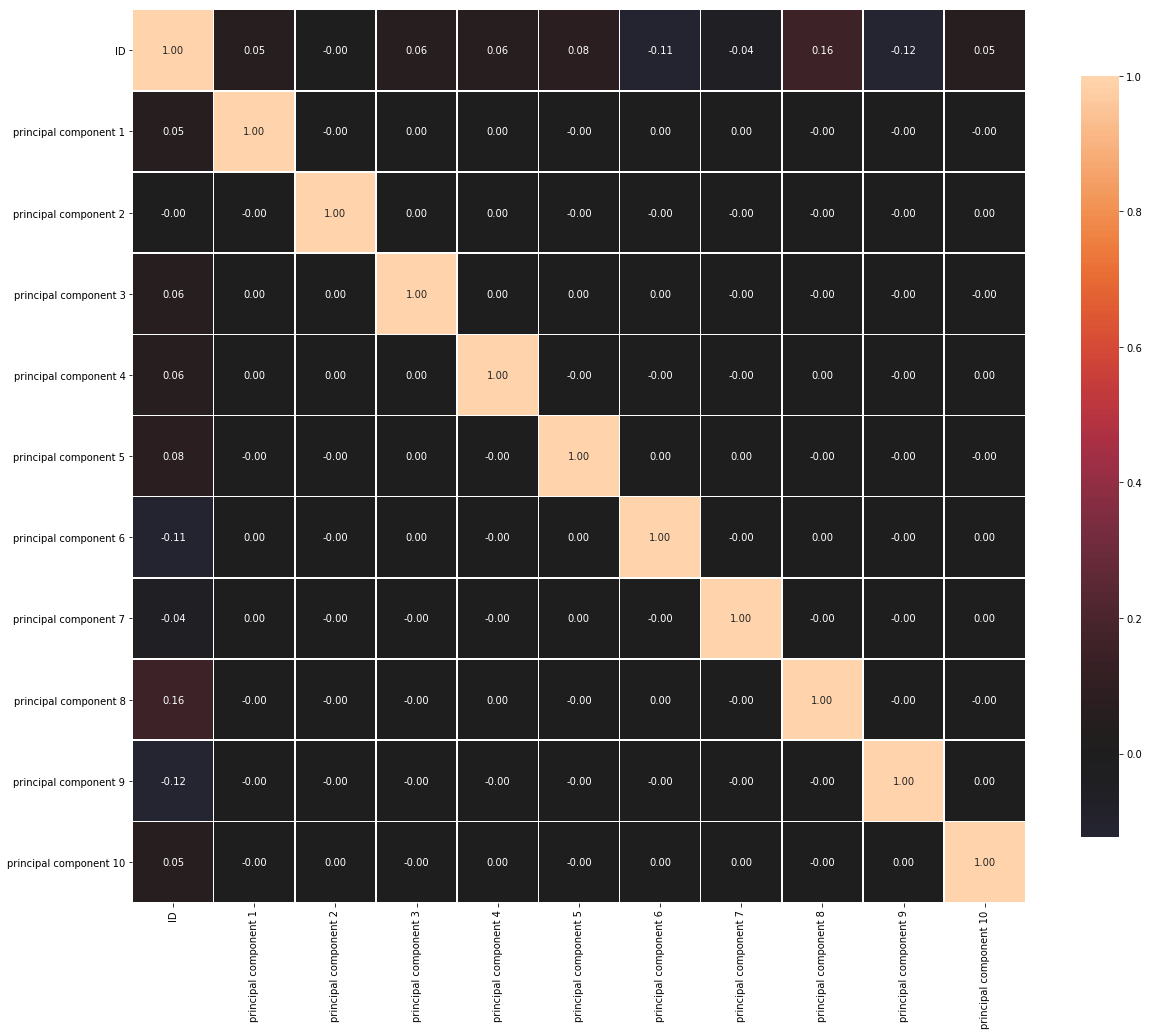

In [17]:
pca_data = pd.DataFrame(principalComponents, columns = pca_columns)
pca_data.insert(0,'ID',train_data.iloc[:,0].values, True)
pca_data.insert(1,'Class',train_data.iloc[:,1].values, True)
train_data = pca_data
correlation_heatmap(pca_data)

### Test data

In [18]:
# pass desired sum of varince ratio we need to be captured 
pca = PCA(0.95)
principalComponents = pca.fit_transform(test_data.iloc[:,2:])

In [19]:
pca.n_components_

10

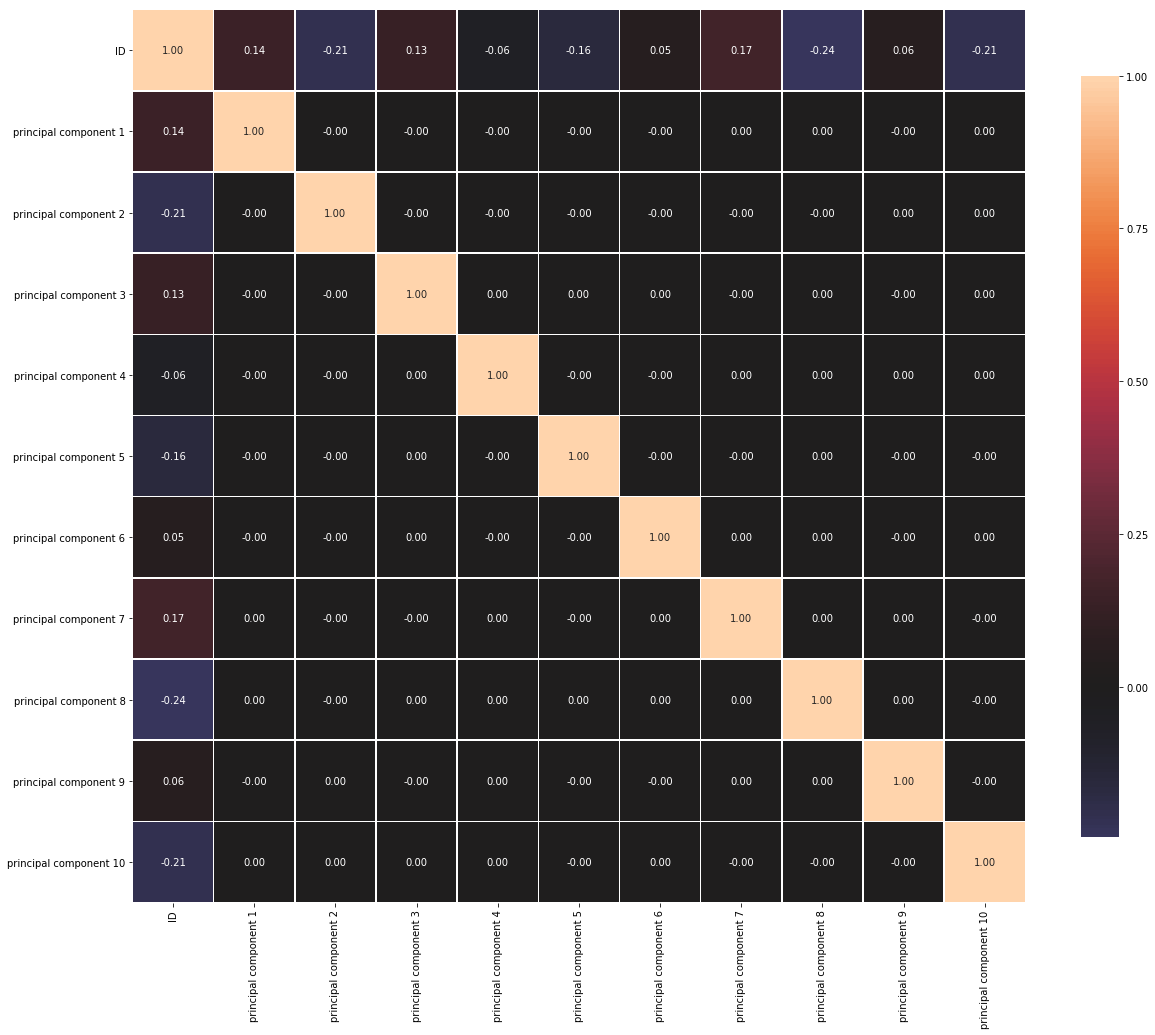

In [20]:
pca_data = pd.DataFrame(principalComponents, columns = pca_columns)
pca_data.insert(0,'ID',test_data.iloc[:,0].values, True)
pca_data.insert(1,'Class',test_data.iloc[:,1].values, True)
test_data = pca_data
correlation_heatmap(pca_data)

### Conclusion
- Principal component analysis convert a set of observations of correlated variables into a set of values of linearly uncorrelated variables called principal components
- less than half of the attributes can describe the data with 0.95 percent.


# Classification

## Decession tree

### select best depth 

In [71]:
def DTC_param_selection(X, y):
    depth = [5, 7, 10, 15, 20, 50]
    DTC = DecisionTreeClassifier(random_state=0)
    param_grid = {'max_depth': depth}
    grid_search = GridSearchCV(DTC, param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [72]:
DTC_param_selection(train_data.iloc[:,2:], train_data.iloc[:,1])

{'max_depth': 5}

- max depth = 5 is the best 

### train the model

In [73]:
DTC = DecisionTreeClassifier(max_depth = 5 ,random_state=0)
DTC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [74]:
y_pred = DTC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [75]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [76]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9193548387096774 for "M" class , 0.9357798165137615 for "B" class
recall:  0.890625 for "M" class , 0.9532710280373832 for "B" class
fscore:  0.9047619047619047 for "M" class , 0.9444444444444445 for "B" class


### Confusion matrix

In [27]:
cm = confusion_matrix(y_true, y_pred, labels=['M', 'B'])
cm

array([[56,  8],
       [ 9, 98]])

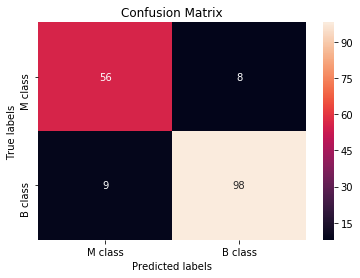

In [28]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['M class', 'B class']); ax.yaxis.set_ticklabels(['M class', 'B class']);

### For different depth  = 15

In [29]:
DTC = DecisionTreeClassifier(max_depth = 15 ,random_state=0)
DTC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [30]:
y_pred = DTC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [31]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [32]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.8615384615384616 for "M" class , 0.9245283018867925 for "B" class
recall:  0.875 for "M" class , 0.9158878504672897 for "B" class
fscore:  0.8682170542635659 for "M" class , 0.9201877934272301 for "B" class


### For different depth  = 50

In [33]:
DTC = DecisionTreeClassifier(max_depth = 50 ,random_state=0)
DTC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [34]:
y_pred = DTC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [35]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [36]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.8615384615384616 for "M" class , 0.9245283018867925 for "B" class
recall:  0.875 for "M" class , 0.9158878504672897 for "B" class
fscore:  0.8682170542635659 for "M" class , 0.9201877934272301 for "B" class


### less valuse for Evaluation matrices than depth equal = 10, so paramter tunning helped to get better accurcy  

## AdaBoost Classifier

### select best depth 

In [77]:
def ABC_param_selection(X, y):
    n_estimators = [10, 50, 100, 200, 500]
    learning_rate = [0.25, 0.5, 1, 1.5, 2, 3]
    ABC = AdaBoostClassifier(random_state=0)
    param_grid = {'n_estimators': n_estimators, 'learning_rate' : learning_rate}
    grid_search = GridSearchCV(ABC, param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [78]:
ABC_param_selection(train_data.iloc[:,2:], train_data.iloc[:,1])

/home/magho/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 1.5, 'n_estimators': 200}

-  learning_rate = 1.5
- n_estimators = 200

### train the model

In [39]:
ABC = AdaBoostClassifier(n_estimators=100, learning_rate = 1, random_state=0)
ABC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=0)

In [40]:
y_pred = ABC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [41]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [42]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.921875 for "M" class , 0.9532710280373832 for "B" class
recall:  0.921875 for "M" class , 0.9532710280373832 for "B" class
fscore:  0.921875 for "M" class , 0.9532710280373832 for "B" class


### Confusion matrix

In [43]:
cm = confusion_matrix(y_true, y_pred, labels=['M', 'B'])
cm

array([[ 59,   5],
       [  5, 102]])

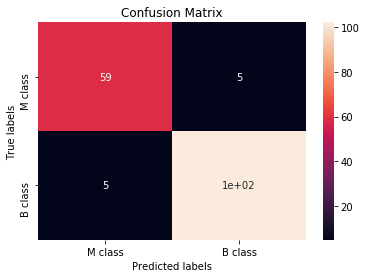

In [44]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['M class', 'B class']); ax.yaxis.set_ticklabels(['M class', 'B class']);

### test for different values for hyper parameters (50, 0.5) 

In [45]:
ABC = AdaBoostClassifier(n_estimators=50, learning_rate = 0.5, random_state=0)
ABC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=50, random_state=0)

In [46]:
y_pred = ABC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [47]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [48]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9375 for "M" class , 0.9626168224299065 for "B" class
recall:  0.9375 for "M" class , 0.9626168224299065 for "B" class
fscore:  0.9375 for "M" class , 0.9626168224299065 for "B" class


### test for different values for hyper parameters (300, 2.5) 

In [80]:
ABC = AdaBoostClassifier(n_estimators=300, learning_rate = 2.5, random_state=0)
ABC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=2.5, n_estimators=300, random_state=0)

In [50]:
y_pred = ABC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [51]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [52]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.8 for "M" class , 0.8867924528301887 for "B" class
recall:  0.8125 for "M" class , 0.8785046728971962 for "B" class
fscore:  0.8062015503875969 for "M" class , 0.8826291079812206 for "B" class


### less valuse for Evaluation matrices than n_estimators=100, learning_rate = 1, so paramter tunning helped to get better accurcy  

## Random Forest Classifier

### select best depth 

In [53]:
def RFC_param_selection(X, y):
    depth = [5, 10, 15, 20, 50]
    n_estimators = [10, 50, 100, 200, 500]
    RFC = RandomForestClassifier(random_state=0)
    param_grid = {'max_depth': depth, 'n_estimators' : n_estimators}
    grid_search = GridSearchCV(RFC, param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [54]:
RFC_param_selection(train_data.iloc[:,2:], train_data.iloc[:,1])

{'max_depth': 10, 'n_estimators': 50}

- max depth = 10 is the best 
- n_estimators = 50

## train the model

In [55]:
RFC = RandomForestClassifier(n_estimators = 100, max_depth = 5 ,random_state=0)
RFC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
y_pred = RFC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [57]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [58]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9344262295081968 for "M" class , 0.9363636363636364 for "B" class
recall:  0.890625 for "M" class , 0.9626168224299065 for "B" class
fscore:  0.9120000000000001 for "M" class , 0.9493087557603687 for "B" class


### Confusion matrix

In [59]:
cm = confusion_matrix(y_true, y_pred, labels=['M', 'B'])
cm

array([[ 57,   7],
       [  4, 103]])

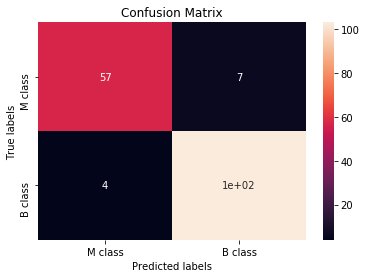

In [60]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['M class', 'B class']); ax.yaxis.set_ticklabels(['M class', 'B class']);

 ### test for different values for hyper parameters (50, 2) 

In [61]:
RFC = RandomForestClassifier(n_estimators = 50, max_depth = 2 ,random_state=0)
RFC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [62]:
y_pred = RFC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [63]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [64]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9830508474576272 for "M" class , 0.9464285714285714 for "B" class
recall:  0.90625 for "M" class , 0.9906542056074766 for "B" class
fscore:  0.943089430894309 for "M" class , 0.9680365296803651 for "B" class


### test for different values for hyper parameters (200, 20) 

In [65]:
RFC = RandomForestClassifier(n_estimators = 200, max_depth = 20 ,random_state=0)
RFC.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
y_pred = RFC.predict(test_data.iloc[:,2:])

### Evaluate model 

In [67]:
y_true = test_data.iloc[:,1]
precision,recall,fscore, support = precision_recall_fscore_support(y_true, y_pred, labels=['M', 'B'])

In [68]:
print('precision:  {0} for "M" class , {1} for "B" class'.format(precision[0], precision[1]))
print('recall:  {0} for "M" class , {1} for "B" class'.format(recall[0], recall[1]))
print('fscore:  {0} for "M" class , {1} for "B" class'.format(fscore[0], fscore[1]))

precision:  0.9344262295081968 for "M" class , 0.9363636363636364 for "B" class
recall:  0.890625 for "M" class , 0.9626168224299065 for "B" class
fscore:  0.9120000000000001 for "M" class , 0.9493087557603687 for "B" class


###  less valuse for Evaluation matrices than n_estimators=100, depth = 5, so paramter tunning helped to get better accurcy  

## Conclusion 
- All the models have very good values for the precession, recall, and F-score
- The best model is the AdaBoostclassifier as the number of wrongly classified samples is less = 9
